In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 07 07:55:15 2016

@author: Wei Wu
"""

import matplotlib
import urllib2
import pandas as pd
import numpy as np
import time
import datetime
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def get_sentiment(pair):
        fullURL = "http://fxtrade.oanda.com/labsds/historical_position_ratios_raw?instrument=%s&period=31536000"%pair
        req = urllib2.Request(fullURL, headers={'User-Agent' : 'Mozilla/5.0 (iPhone; CPU iPhone OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A403 Safari/8536.25'})
        try: 
            con = urllib2.urlopen(req)
        except urllib2.HTTPError, e:
            checksLogger.error('HTTPError = ' + str(e.code))
        except urllib2.URLError, e:
            checksLogger.error('URLError = ' + str(e.reason))
        except httplib.HTTPException, e:
            checksLogger.error('HTTPException')
        except Exception:
            import traceback
            checksLogger.error('generic exception: ' + traceback.format_exc())
        cr = pd.read_csv(con)
        return cr
df = get_sentiment('eur_usd')

In [35]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')
df= df.set_index(df.timestamp)

In [43]:
df = df.drop(['timestamp'],axis=1)
df.tail()

,pct_long,price
timestamp,,
2017-05-11 16:00:01,38.28,1.0869
2017-05-12 16:00:01,38.60,1.0926
2017-05-13 16:00:00,36.59,1.0931
2017-05-14 16:00:00,36.59,1.0931
2017-05-15 08:40:01,38.33,1.0943


In [52]:
xdat = df.pct_long
ydat = df.price
model = pd.ols(y=ydat, x=xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         364
Number of Degrees of Freedom:   2

R-squared:         0.3881
Adj R-squared:     0.3864

Rmse:              0.0213

F-stat (1, 362):   229.6290, p-value:     0.0000

Degrees of Freedom: model 1, resid 362

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0020     0.0001     -15.15     0.0000    -0.0022    -0.0017
     intercept     1.1861     0.0064     185.19     0.0000     1.1736     1.1987
---------------------------------End of Summary---------------------------------

In [53]:
model.beta

x           -0.001980
intercept    1.186125
dtype: float64

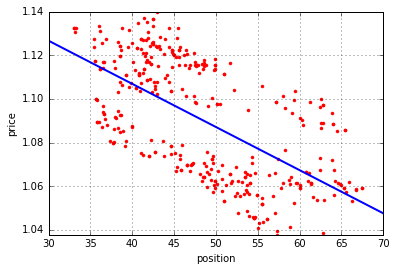

In [58]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('position')
plt.ylabel('price')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [55]:
df.corr()

,pct_long,price
pct_long,1.000000,-0.623001
price,-0.623001,1.000000


/home/weiwu/.virtualenvs/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20).corr(other=<Series>)
  from ipykernel import kernelapp as app


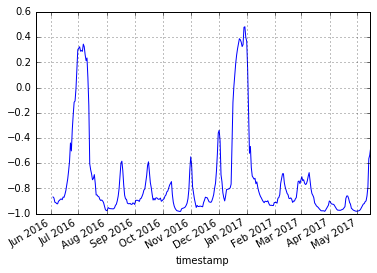

In [57]:
pd.rolling_corr(xdat, ydat,
                window=20).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

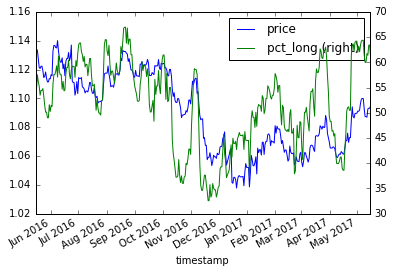

In [67]:
df.price.plot(legend=True)
(100-df.pct_long).plot(secondary_y=True, style='g', legend=True)